## Capstone Project Working Copy

# <p style="font-size:40px ; color:blue" align="center">Capstone: Enron Emails Analysis Using NLP and Time Series</p> <sub>By Stephanie, Paige, Rajaram, Kan - 14 March 2022</sub>

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Overview  </br>
    
## Project Description: What is the morale of your company?


## Goal: 


## Support:

In [2]:
# Import Needed Libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Acquire  </br>
- ???

In [ ]:
# read original df into pandas dataframe
df = pd.read_csv('emails.csv', index_col=0)
df.head()

In [ ]:
df.shape

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Prepare  </br>
- ???

## See Message Body

In [ ]:
df.message.values

## Parse Emails for Date, Content

In [ ]:
from email.parser import Parser

bodies = []
dates = []
senders = []
subjects = []

# loop through email messages
for i in df.message:
    # parse and set message to email data type
    headers = Parser().parsestr(i)
    # get the body text of the email
    body = headers.get_payload()
    # get the date from email
    date = headers['Date']
    # get sender of email
    sender = headers['From']
    # get email subject
    subject = headers['Subject']
    # append date, body, sender, subjectg text to lists
    bodies.append(body)
    dates.append(date)
    senders.append(sender)
    subjects.append(subject)

In [ ]:
# show list of email text
bodies

In [ ]:
# show list of dates
dates

In [ ]:
asdfasdf

In [ ]:
# Set lists to dataframes
body_df = pd.DataFrame(bodies, columns = ['content'])
dates_df = pd.DataFrame(dates, columns = ['date'])
senders_df = pd.DataFrame(senders, columns = ['sender'])
subjects_df = pd.DataFrame(subjects, columns = ['subject'])

In [ ]:
body_df.head()

In [ ]:
dates_df.head()

In [ ]:
df['date'] = dates_df
df.head()

In [ ]:
df['content'] = body_df
df.head()

In [ ]:
df['sender'] = senders_df
df.head()

In [ ]:
df['subject'] = subjects_df
df.head()

In [ ]:
# # Insert those data frames into our orignal dataframe
# df.insert(1, "content", body_df)
# df.insert(1, "date", dates_df)

In [ ]:
df.shape

In [ ]:
# import os

# def content():
#     '''
#     '''
#     if os.path.isfile('content.csv'):
#         df = pd.read_csv('content.csv')

#     else:
#         from email.parser import Parser

#         bodies = []
#         dates = []

#         # loop through email messages
#         for i in df.message:
#             # parse and set message to email data type
#             headers = Parser().parsestr(i)
#             # get the body text of the email
#             body = headers.get_payload()
#             # get the date from email
#             date = headers['Date']
#             # append date and body text to lists
#             bodies.append(body)
#             dates.append(date)


#         # Set lists to dataframes
#         body_df = pd.DataFrame(bodies, columns = ['content'])
#         dates_df = pd.DataFrame(dates, columns = ['date'])

#         df['date'] = dates_df
#         df['content'] = body_df

#         df.to_csv('content')
    
#     return df

In [ ]:
import os
if not os.path.isfile('content.csv'):
    df.to_csv('content.csv')

## Clean, Tokenize, Stem, Lemmatize, StopWords, Split

### Clean

In [ ]:
import unicodedata
import re

def basic_clean(string):
    '''
    This function takes in a string and
    returns the string normalized.
    '''
    string = string.lower()
    string = unicodedata.normalize('NFKD', string)\
            .encode('ascii', 'ignore')\
            .decode('utf-8', 'ignore')
    string = re.sub(r"[^a-z0-9'\s]", "", string)

    return string

In [ ]:
df['clean'] = df.content.apply(basic_clean)
df.head()

In [ ]:
df.shape

In [ ]:
import os
if not os.path.isfile('clean.csv'):
    df.to_csv('clean.csv')

### Tolkenize

In [ ]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
def tokenize(string):
    '''
    This function takes in a string and
    returns a tokenized string.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()
    
    # Use tokenizer
    string = tokenizer.tokenize(string, return_str = True)
    
    return string

In [ ]:
df['tokenize'] = df.clean.apply(tokenize)
df.head()

In [ ]:
df.shape

In [ ]:
import os
if not os.path.isfile('tokenize.csv'):
    df.to_csv('tokenize.csv')

### Stop Words

In [ ]:
from nltk.corpus import stopwords
def remove_stopwords(string, extra_words=None, exclude_words=None):
        """remove_stopwords [summary]
        Args:
            string ([type]): [description]
            extra_words ([type], optional): [description]. Defaults to None.
            exclude_words ([type], optional): [description]. Defaults to None.
        Returns:
            [type]: [description]
        """

        stopw = stopwords.words('english')

        if extra_words:
            stopw.append(word for word in extra_words)

        elif exclude_words:
            stopw.remove(word for word in exclude_words)

        words = string.split()
        filtered_words = [word for word in words if word not in stopw]

        return ' '.join(filtered_words)

In [ ]:
df['stop_words'] = df.tokenize.apply(remove_stopwords)
df.head()

In [ ]:
import os
if not os.path.isfile('stop_words.csv'):
    df.to_csv('stop_words.csv')

### Stemm

In [ ]:
import nltk
def stemm(string):
    '''
    This function takes in a string and
    returns a string with words stemmed.
    '''
    # Create porter stemmer.
    ps = nltk.porter.PorterStemmer()
    
    # Use the stemmer to stem each word in the list of words we created by using split.
    stems = [ps.stem(word) for word in string.split()]
    
    # Join our lists of words into a string again and assign to a variable.
    string = ' '.join(stems)
    
    return string

In [ ]:
df['stemm'] = df.tokenize.apply(stemm)
df.head()

In [ ]:
import os
if not os.path.isfile('stemm.csv'):
    df.to_csv('stemm.csv')

### Lemm

In [ ]:
from nltk.stem import WordNetLemmatizer
def lemmatize(string):
    """lemmatize [summary]
    Args:
        string ([type]): [description]
    Returns:
        [type]: [description]
    """

    wnl = WordNetLemmatizer()
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    return  ' '.join(lemmas)

In [ ]:
df['lemmatize'] = df.tokenize.apply(lemmatize)
df.head()

In [ ]:
import os
if not os.path.isfile('lemmatize.csv'):
    df.to_csv('lemmatize.csv')

### Combo Function

In [ ]:
# def clean_emails(df, column = 'content'):
#     '''
#     [add docstring]
#     '''
    
#     if os.path.isfile('emails.csv'):
#         df = pd.read_csv('emails.csv')
    
#     else:
#         df['clean'] = df[column].apply(basic_clean)\
#                         .apply(tokenize)\
#                         .apply(stem)
#         df.to_csv('emails.csv')

#     return df

### Sentiment Analysis

In [ ]:
df.isna().sum()

In [ ]:
df.shape

In [ ]:
import nltk.sentiment
sia = nltk.sentiment.SentimentIntensityAnalyzer()
df['sentiment'] = df.lemmatize.apply(lambda doc: sia.polarity_scores(doc)['compound'])
df.head()

In [ ]:
df.isna().sum()

In [ ]:
import os
if not os.path.isfile('sentiment.csv'):
    df.to_csv('sentiment.csv')

In [ ]:
## is the mean and median values of sentiment score different for ham vs spam?
# df.groupby('label').sentiment.agg(['mean','median'])

In [ ]:
## plot message_length vs sentiment and hue by label
# sns.relplot(data = df, x = 'message_length', y = 'sentiment', hue = 'label')

In [ ]:
## is the distribution for sentiment different for ham vs spam
# sns.kdeplot(df[df.label == 'ham'].sentiment, label = 'ham')
# sns.kdeplot(df[df.label == 'spam'].sentiment, label = 'spam')
# plt.legend(['ham', 'spam'])

In [ ]:
## Bivariate KDE plot for message_length vs sentiment score 
# sns.kdeplot(df[df.label == 'ham'].message_length,df[df.label == 'ham'].sentiment, levels = 30, shade = True )
# sns.kdeplot(df[df.label == 'spam'].message_length,df[df.label == 'spam'].sentiment, levels = 30, shade = True, alpha = 0.5 )

## Topic Modeling

### Keep only columns needed for Topic Modeling

In [ ]:
# import gensim
# from gensim.utils import simple_preprocess
# from gensim.parsing.preprocessing

# import nltk nltk.download('wordnet')


## Time Series

In [ ]:
from datetime import timedelta, datetime

In [15]:
df = pd.read_csv('sentiment.csv', index_col=0)
df.head()

,file,message,date,content,sender,subject,clean,tokenize,stop_words,stemm,lemmatize,sentiment
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,phillip.allen@enron.com,NaN,here is our forecast\n\n,here is our forecast,forecast,here is our forecast,here is our forecast,0.0000
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,phillip.allen@enron.com,Re:,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,travel to have a busi meet take the fun out of...,traveling to have a business meeting take the ...,0.9313
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,phillip.allen@enron.com,Re: test,test successful way to go,test successful way to go,test successful way go,test success way to go,test successful way to go,0.5859
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",phillip.allen@enron.com,NaN,randy\n\n can you send me a schedule of the sa...,randy\n\n can you send me a schedule of the sa...,randy send schedule salary level everyone sche...,randi can you send me a schedul of the salari ...,randy can you send me a schedule of the salary...,0.0000
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,Re: Hello,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' s shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,-0.3400


In [ ]:
# # create time series dataframe
# ts = df[['date', 'sentiment']]
# ts.head()

In [ ]:
# check for nulls
ts.isna().sum()

In [ ]:
ts.sentiment.plot.hist()

In [10]:
ts = pd.read_csv('time_series.csv', index_col=0)
ts.head()

,date,sentiment
0,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",0.0000
1,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",0.9313
2,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",0.5859
3,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",0.0000
4,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",-0.3400


In [11]:
# change date column to datetime format
ts.date = pd.to_datetime(ts.date, utc=True)
ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517401 entries, 0 to 517400
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   date       517401 non-null  datetime64[ns, UTC]
 1   sentiment  517401 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 11.8 MB


In [ ]:
# change date column to datetime format
df.date = pd.to_datetime(df.date, utc=True)
df.info()

In [12]:
# Set index at date columnad and sort index
ts = ts.set_index("date").sort_index()
ts.head()

,sentiment
date,
1980-01-01 00:00:00+00:00,0.6124
1980-01-01 00:00:00+00:00,0.0000
1980-01-01 00:00:00+00:00,0.9979
1980-01-01 00:00:00+00:00,0.7964
1980-01-01 00:00:00+00:00,0.8126


In [ ]:
# Set Index as date column and sort index
df = df.set_index("date").sort_index()
df.head()

In [ ]:
ts.index.dtype, df.index.dtype

In [ ]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df.head()

In [ ]:
ts.index.min(), ts.index.max()

In [ ]:
# check for time gaps
print('Number of rows:', df.index.nunique())
n_days = df.index.max() - df.index.min() + pd.Timedelta('1d')
print(f"Number of days between first and last day:", n_days)

In [ ]:
# plot sentiment over time
ts.plot(figsize=(20,10))

In [ ]:
import os
if not os.path.isfile('timedate.csv'):
    df.to_csv('timedate.csv')

In [ ]:
import os
if not os.path.isfile('time_series.csv'):
    df.to_csv('time_series.csv')

## Note:
- most emails occured by between 1998 and 2003
- Should remove emails outside of those dates

## Remove Emails Before 1998 and After 2003

In [13]:
# Filter out rows that are below 1995 and above 2005
ts = ts[(ts.index > '1998') & (ts.index < '2003')]
ts.head()

,sentiment
date,
1998-01-04 17:46:00+00:00,0.9118
1998-01-06 01:32:00+00:00,0.9442
1998-01-06 01:32:00+00:00,0.9442
1998-01-06 01:32:00+00:00,0.9442
1998-05-27 15:31:00+00:00,0.8750


<AxesSubplot:>

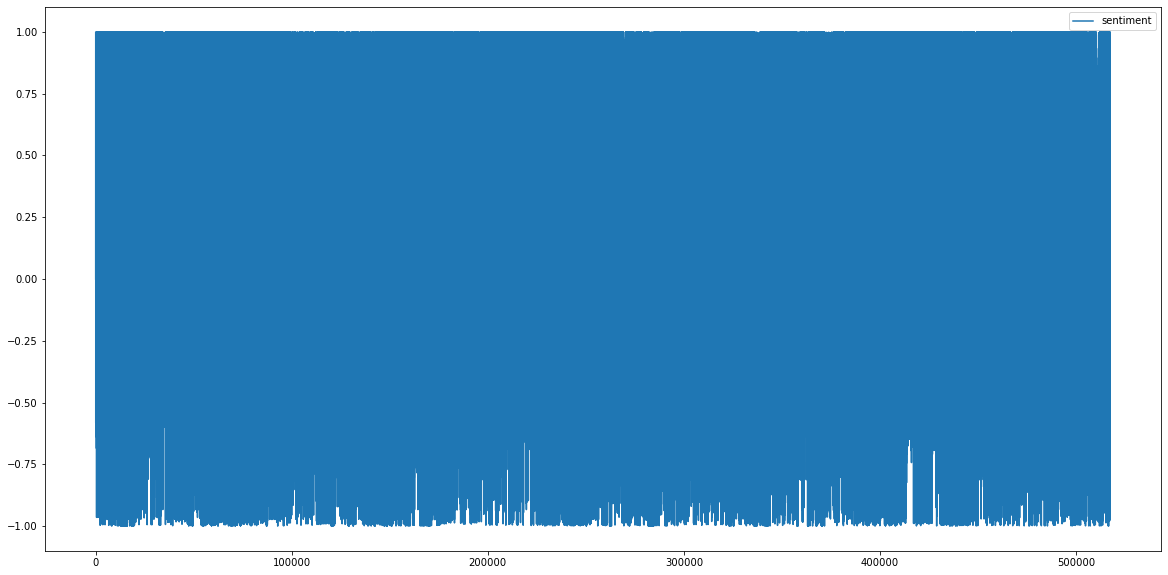

In [8]:
# Plot sentiment of email between 1998 and 2003
ts.plot(figsize=(20,10))

## Simple Moving Average with Nulls Imputed to Zero (Resample)

In [ ]:
# Resample for Yearly
ts_1y = ts.resample('Y').mean().fillna(0)
ts_1y.plot(figsize=(20,10))
ts_1y.head()

In [ ]:
# Resample for Quarterly
ts_3m = ts.resample('3M').mean().fillna(0)
ts_3m.plot(figsize=(20,10))
ts_3m.head()

In [ ]:
# Resample for Monthly
ts_1m = ts.resample('M').mean().fillna(0)
ts_1m.plot(figsize=(20,10))
ts_1m.head()

In [ ]:
# Resample for Weekly
ts_7d = ts.resample('W').mean().fillna(0)
ts_7d.plot(figsize=(20,10))
ts_7d.head()

In [ ]:
# Resample for Weekly
ts_7d = ts.resample('W').mean().fillna(0)
ts_7d.plot(figsize=(20,10))
ts_7d.head()

In [ ]:
# Resample for Daily with forwad fill
ts_1d = ts.resample('D').mean().fillna(0)
ts_1d.plot(figsize=(20,10))
ts_1d.head()

## Time_Series Combined

## Rolling Average with Null Imputed to Zero

In [ ]:
# Rolling Averages
rolling_ts = ts.resample('W').mean().fillna(0).assign(
    rolling_1w=lambda ts: ts.sentiment.rolling(1).mean().fillna(0),
    rolling_4w=lambda ts: ts.sentiment.rolling(4).mean().fillna(0),
    rolling_12w=lambda ts: ts.sentiment.rolling(12).mean().fillna(0),
)
rolling_ts.plot(figsize=(20,10))
rolling_ts.head()

In [ ]:
ts.index.max()

In [ ]:
# add rolling columns to df
df

## Split: By Year
- Timeline: https://www.theguardian.com/business/2006/jan/30/corporatefraud.enron
    - 1998: Enron buys Britain's Weessex Water
    - Nov 1999: Enron Online (first global commidty trading platform) launches
    - Aug 2000: Enron shares hit all time high
    - 5 Feb 2001: Arthur Andersen considers not serving Enron due to special partnerships to disguise debt
    - 14 Aug 2001: Jeff Skilling (CEO from 12 Feb 2001) resigns for personal reasons
    - 15 Aug 2001: Sheron Watkins (VP) warns Kenneth Lay (CEO) of question accounting practices
    - 24 Oct 2001: Andrew Fastow (CFO) is fired
    - 8 Nov 2001: Enron announced it overstated profits by 60M going back to 1997
    - 2 Dec 2001: Enron files for bankruptsy
    - 3 Dec 2001: Eron lays off 4K employees 
    - 9 Jan 2002: Justice Department investigates Enron
    - 24 Jan 2002: Kenneth Lay (CEO) resigns
    - 14 Mar 2002: Arthur Andersen indicted 
    - 31 Oct 2002: Fastow indicted

In [17]:
df.head()

,file,message,date,content,sender,subject,clean,tokenize,stop_words,stemm,lemmatize,sentiment
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,phillip.allen@enron.com,NaN,here is our forecast\n\n,here is our forecast,forecast,here is our forecast,here is our forecast,0.0000
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,phillip.allen@enron.com,Re:,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,travel to have a busi meet take the fun out of...,traveling to have a business meeting take the ...,0.9313
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,phillip.allen@enron.com,Re: test,test successful way to go,test successful way to go,test successful way go,test success way to go,test successful way to go,0.5859
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",phillip.allen@enron.com,NaN,randy\n\n can you send me a schedule of the sa...,randy\n\n can you send me a schedule of the sa...,randy send schedule salary level everyone sche...,randi can you send me a schedul of the salari ...,randy can you send me a schedule of the salary...,0.0000
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,Re: Hello,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' s shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,-0.3400


In [18]:
# set train data up to 13Aug2001, day before Jeff Skilling resigns for personal reasons
train = df[:'2001-08-13'] # includes 2016
test = df['2001-08-14']

plt.figure(figsize=(20,10))
plt.plot(train.date, train.sentiment)
plt.plot(test.date, test.sentiment)

TypeError: cannot do slice indexing on Int64Index with these indexers [2001-08-13] of type str

In [ ]:
train.index.min(), train.index.max()

In [ ]:
train.shape

In [ ]:
train.head()

In [ ]:
# train data for time series
train_ts = train[['sentiment','sender','subject']]
train_ts

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Explore
- ???

## Questions to Explore:

- Question 1: How many messages were forwarded?
- Question 2: Did certain individuals forward more messages than others?
- Question 3: What messages were forwarded the most?
- Question 4: Were there any trends in messages with blind carbon copy recipients?/with certain blind carbon copy recipients?
- Question 5: Who were the top 5 / low 5 sentiment scores?
- Question 6: What department had the lowest average sentiment score?

In [ ]:
# Rolling Averages
rolling_ts = ts.resample('W').mean().fillna(0).assign(
    rolling_1w=lambda ts: ts.sentiment.rolling(1).mean().fillna(0),
    rolling_4w=lambda ts: ts.sentiment.rolling(4).mean().fillna(0),
    rolling_12w=lambda ts: ts.sentiment.rolling(12).mean().fillna(0),
)
rolling_ts.plot(figsize=(20,10))
rolling_ts.head()

In [ ]:
# see distribution of target variable
df.sentiment.plot.hist()

In [ ]:
# see target variable over time
df.sentiment.plot()

In [ ]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature by Month', xlabel='Month', ylabel='Temp (F)')

In [ ]:
(
    y.reset_index()
    .assign(weekday=lambda df: df.datetime.dt.day_name())
    .pipe((sns.boxplot, 'data'), y='temp', x='weekday')
)


In [ ]:
# Plot multiple resamples
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Monthly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

In [ ]:
<matplotlib.legend.Legend at 0x407de86280>

In [ ]:
# Plot rolling averages
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend()

In [ ]:
<matplotlib.legend.Legend at 0x407e8ae100>

In [ ]:
# Plot Change over time
y.resample('W').mean().diff().plot(title='Average week-to-week change in temperature')

In [ ]:
<AxesSubplot:title={'center':'Average week-to-week change in temperature'}, xlabel='datetime'>

In [ ]:
# Plot seasonality. unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

In [ ]:
<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='datetime'>

In [ ]:
# Seasonal Decomposition
y = train.temp.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


In [ ]:
decomposition.iloc[:, 1:].plot()


In [ ]:
<AxesSubplot:xlabel='datetime'>


In [ ]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None


In [ ]:
# Plot categories over time
train = train.resample('D').mean()
# create a categorical feature
train['temp_bin'] = pd.qcut(train.temp, 4, labels=['cold', 'cool', 'warm', 'hot'])
train.groupby('temp_bin').mean()


In [ ]:
# Work Around for order by Months
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None


## Visualizations and Statistical Testing
- For the statistical testing done on questions 3 and 4 the significance level equals 0.05.

## Exploration Summary:
- ???

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Model

- ???

## Pre-Process

### TD_IDF

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf = TfidfVectorizer()
# tfidfs = tfidf.fit_transform(df.values())
# tfidfs

In [ ]:
# pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names())

## Model

### Prep for Prophet

In [ ]:
# see train_ts
train_ts.head()

In [ ]:
# filter train_ts to include only sentiment for modeling
train_tss = train_ts[['sentiment']]
train_tss.head()

In [ ]:
# train_tss_4wr
train_tssr1d = train_tss.resample('D').mean().fillna(0)
train_tssr1d.head()

In [ ]:
train_tssr1d.index.dtype

In [ ]:
# remove timezone for ds column
train_tssr1d = train_tssr1d.tz_convert(None)
train_tssr1d.index.dtype

In [ ]:
train_tssr1d.head()

In [ ]:
train_tssrr1d = train_tssr1d.rolling(30).mean().fillna(0).reset_index().rename(columns={'date':'ds','sentiment':'y'})
train_tssrr1d.head()

In [ ]:
train_tssrr1d.info()

### Facebook Prophet

In [ ]:
from prophet import Prophet

# create prophet object
m = Prophet()

# fit prophet object to df with datetime and continuous value
m.fit(train_tssrr1d)

In [ ]:
# create a fit dataframe that include 365 days into the future. this will be used to make a prediction
future = m.make_future_dataframe(periods=365)
future.tail()

In [ ]:
fcst = m.predict(future)
fcst[['ds','yhat','yhat_lower','yhat_upper']].tail()

In [ ]:
fcst.head()

In [ ]:
viz_1 = Prophet.plot(m, fcst)
viz_1

In [ ]:
# Plot forecast components like trend, yearly seasonality, and weekly seasonality of the time series
viz_2 = m.plot_components(fcst)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

import plotly.graph_objs as go
from plotly.subplots import make_subplots

import plotly.offline as py
py.init_notebook_mode()

In [ ]:
plot_components_plotly(m, fcst)

## Baseline

## Model 1: 

## Model 2: 

## Model 3: 

## Evaluation

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Conclusion </br>
## Summary:
- ???

## Recommendation:
- ???

## Next Steps:
- ???

## Load Pickle

In [ ]:
import pickle
pickle_file = open("eron_data", "rb")
objects = []
while True:
    try:
        objects.append(pickle.load(pickle_file))
    except EOFError:
        break
pickle_file.close()

print(objects)